## 1) Business Understanding

a. Business Problem

Dựa trên Bộ dữ liệu về bệnh tim sẽ được sử dụng, bộ dữ liệu chứa dữ liệu liên quan đến nhân khẩu học và tình trạng lâm sàng của bệnh nhân có thể được sử dụng để ước tính khả năng mắc hoặc không mắc bệnh tim ở bệnh nhân, cũng như những yếu tố nào có thể ảnh hưởng đến sự hiện diện hoặc không có bệnh tim.

b. Goals

- Xác định những đặc điểm có ảnh hưởng nhiều nhất đến việc có hay không có bệnh tim ở bệnh nhân. Điều này có thể được sử dụng để xác định các chiến lược điều trị và phòng ngừa cho bệnh nhân.
- Xây dựng mô hình dự đoán có thể phân loại bệnh nhân mắc bệnh tim hay không mắc bệnh tim dựa trên thuộc tính lâm sàng.

## 2) Data Understanding

### Import Libraries and dataset

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('heart_disease_dataset.csv')

### Display top 5 rows of the dataset

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Đây là 14 thuộc tính trong dataset**
- age: tuổi tính theo năm (độ tuổi từ 29 - 77)
- sex: giới tính (1: nam, 0: nữ)
- cp (chest pain): Các loại đau thắt ngực 
    - 0: typical angina (Đau thắt ngực điển hình)
    - 1: atypical angina (Đau thắt ngực không điển hình)
    - 2: non-anginal pain (Đau không phải là đau thắt ngực)
    - 3: asymtomatic (Không có triệu chứng)
- trestbps (resting blood pressure): huyết áp lúc nghỉ (mmHg)
- chol (cholesterol): cholestoral trong huyết thanh (mg/dl)
- fbs (fasting blood sugar): đường huyết lúc đói (> 120 mg/dl, 1 = true, 0 = false)
- restecg (resting electrocardiogram): điện tâm đồ lúc nghỉ
    - 0: bình thường
    - 1: có sóng ST-T bất thường
    - 2: có khả năng hoặc chắc chắn đã xuất hiện tăng thể tích thất trái của tim
- thalach (maximum heart rate achieved): tần số tim tối đa đạt được.
- exang (exercise-induced angina): đau thắt ngực do tập luyện (1: có, 2 không)
- oldpeak: chỉ số thể hiện độ giảm của segment ST của sóng ECG trên trục thời gian sau khi tập thể dục
- slope: mô tả độ dốc của đoạn ST của sóng điện tâm đồ (ECG) trong giai đoạn đỉnh (peak exercise) của bài kiểm tra thể lực
    - 0: dốc lên
    - 1: phẳng
    - 2: dốc xuống
- ca (number of major vessels): số lượng các mạch chính bị tắc nghẽn trong bộ máy mạch máu của tim mạch
- thal (thalassemia): bệnh thiếu máu do tan máu,
    - 0: lỗi
    - 1: bình thường
    - 2: khuyết tật cố định trong tim mạch (gây ra rủi ro cho sức khỏe)
    - 3: khuyết tật có thể đảo ngược (tổn thương đó có thể được chữa trị hoặc phục hồi)
- target: chẩn đoán bệnh tim (0: không, 1: có)
    

### The shape of dataset (Number of Rows and Number of Columns)

In [4]:
data.shape
print("Number of rows", data.shape[0])
print("Number of columns", data.shape[1])

Number of rows 1025
Number of columns 14


### Get Information About Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## 3) Data Preprocessing

### Check null values in the dataset

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Get overall statistic about the dataset

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Draw Correlation Matrix

<AxesSubplot: >

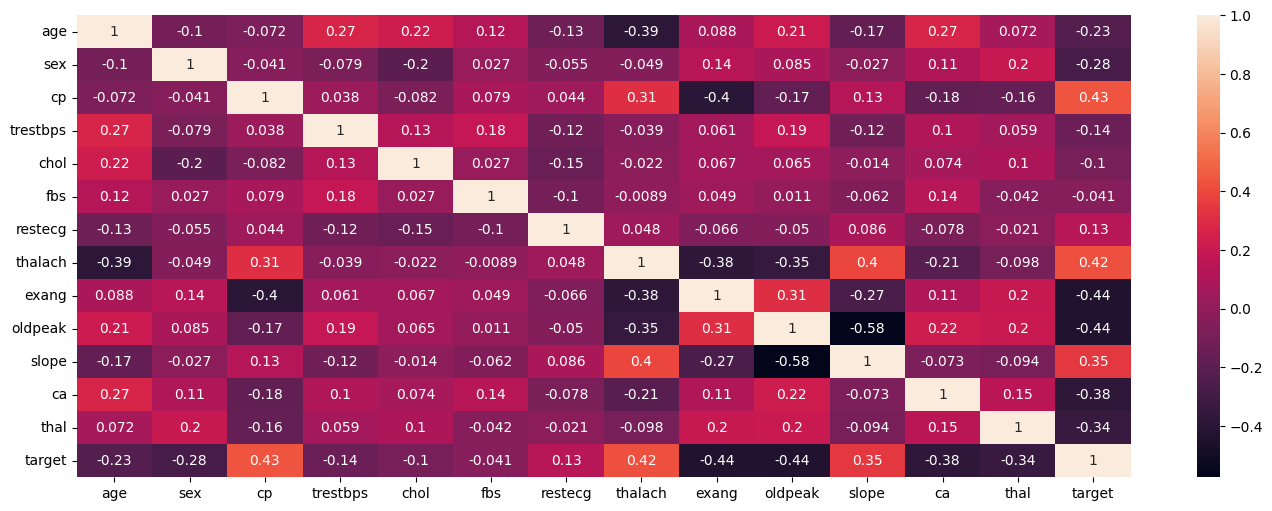

In [8]:
plt.figure (figsize=(17,6))
sns.heatmap(data.corr(), annot=True)

### Outliers

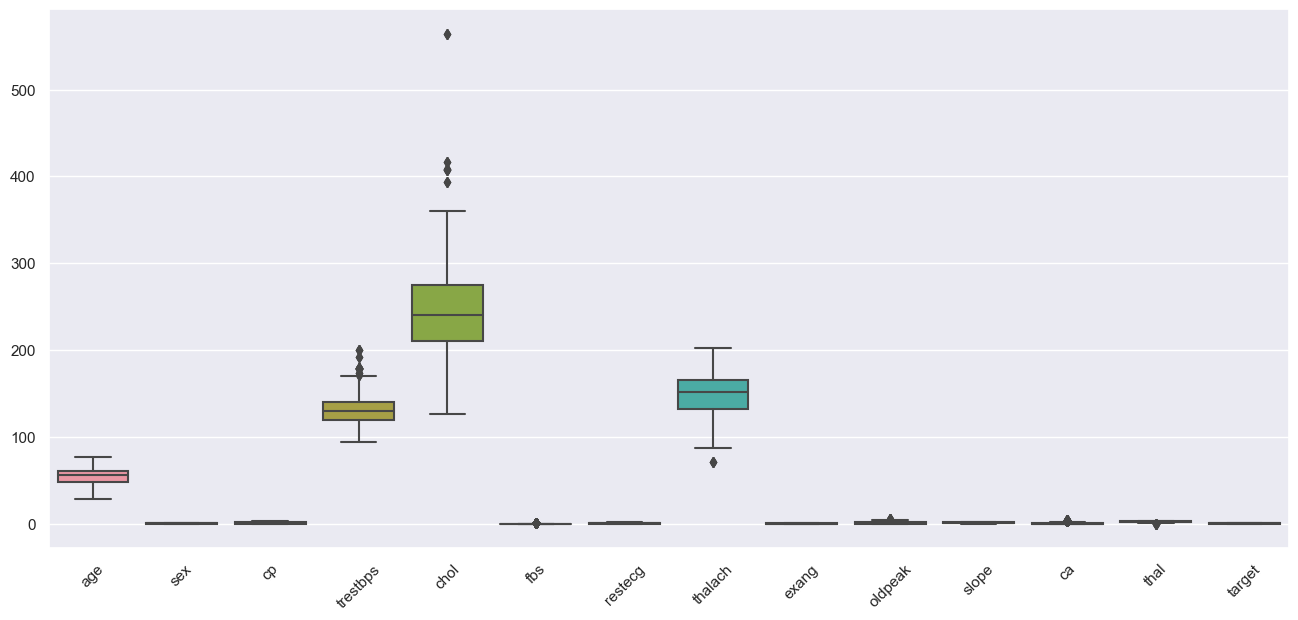

In [9]:
sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

In [10]:
data['thal'].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

columns 'thal' have few outliers

<AxesSubplot: >

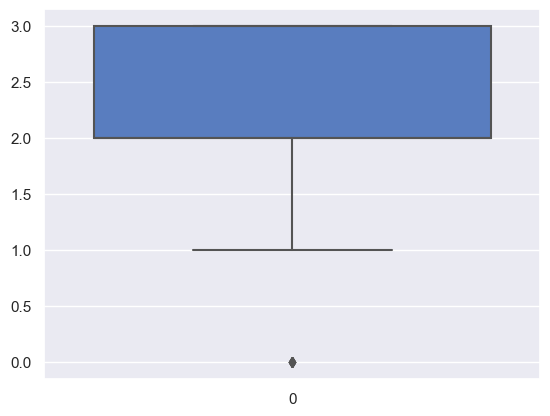

In [11]:
sns.boxplot(data['thal'])

In [12]:
data[data['thal'] == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
319,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
329,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
686,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
734,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
893,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [13]:
data['thal'].replace(0, 2, inplace=True)

In [14]:
data['thal'].value_counts()

2    551
3    410
1     64
Name: thal, dtype: int64

## 4) Visualization

### How many people have and dont have heart disease

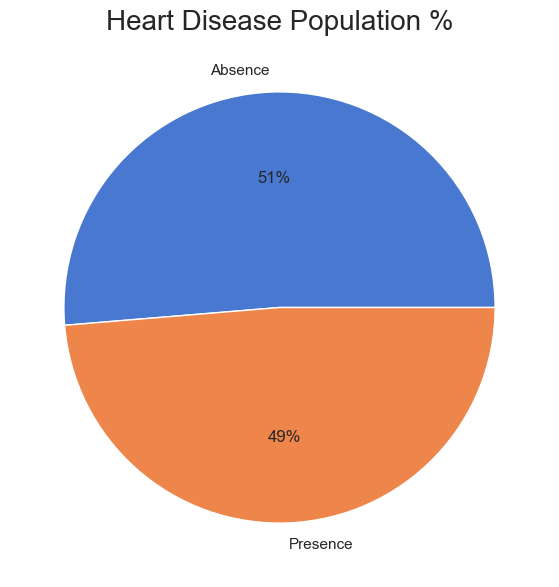

In [15]:
plt.figure(figsize=(10,7))
plt.pie(data['target'].value_counts(), labels=['Absence', 'Presence'], autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()

From the overall population, people having disease (51%) are same those who doesn't have heart disease (49%)

### Find count of Male & Female in this Dataset

In [16]:
data['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

([<matplotlib.axis.XTick at 0x16abd12f160>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

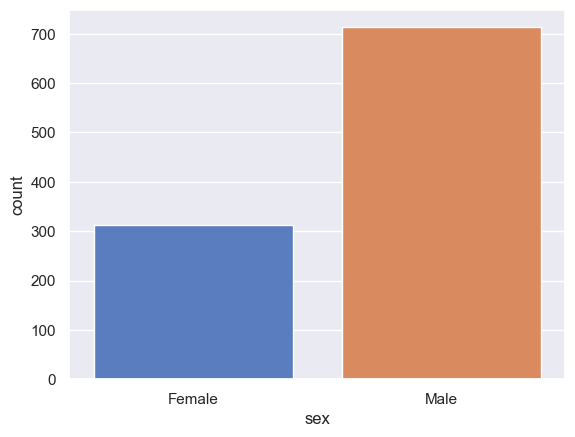

In [17]:
sns.countplot(x='sex', data=data)
plt.xticks([0,1], ['Female', 'Male'])

### Find gender distribution According to the target variable

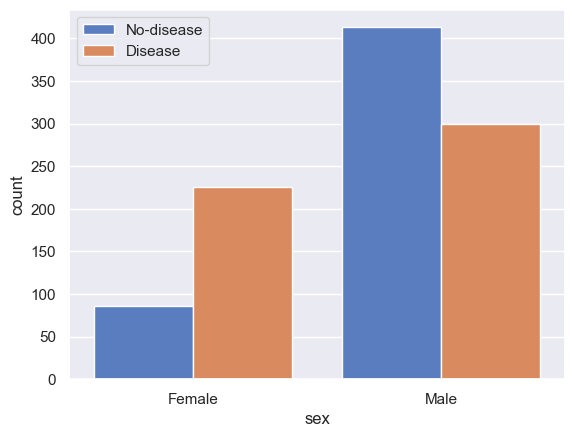

In [18]:
sns.countplot(x='sex', hue='target', data=data)
plt.xticks([0,1], ['Female', 'Male'])
plt.legend(labels=['No-disease', 'Disease'])

### Check age distribute 

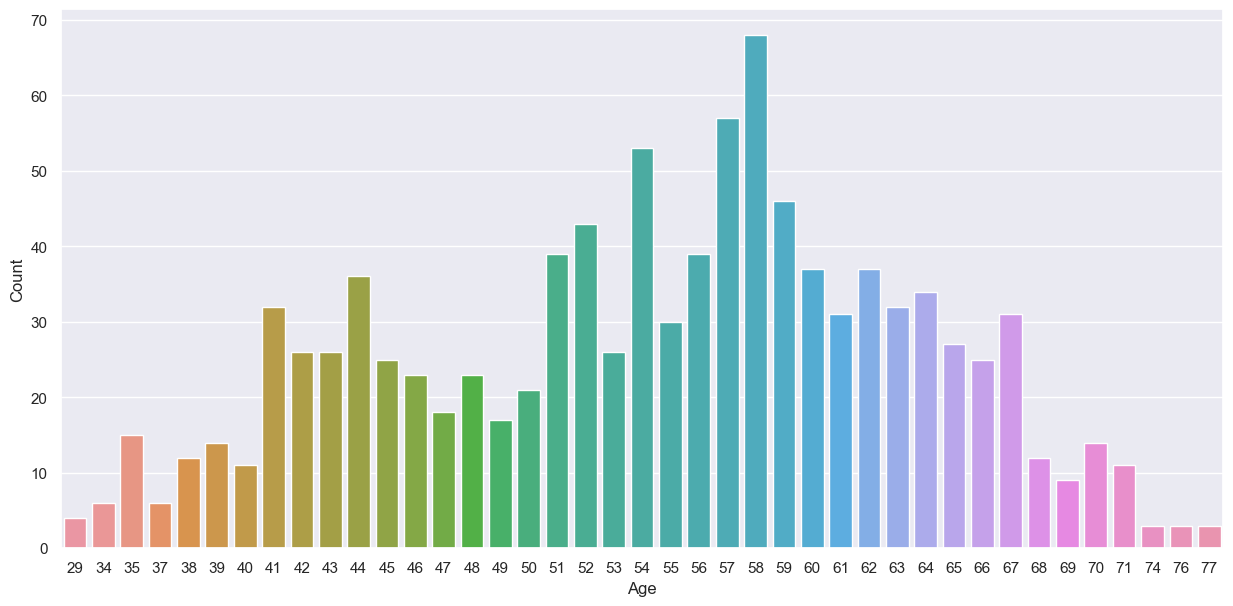

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(x='age', data=data)
plt.xlabel(xlabel='Age')
plt.ylabel(ylabel='Count')
plt.show()

### Check chest pain type

([<matplotlib.axis.XTick at 0x16abd22d5a0>,
 [Text(0, 0, 'typical angina'),
  Text(1, 0, 'atypical angina'),
  Text(2, 0, 'non-anginal pain'),
  Text(3, 0, 'asymtomatic')])

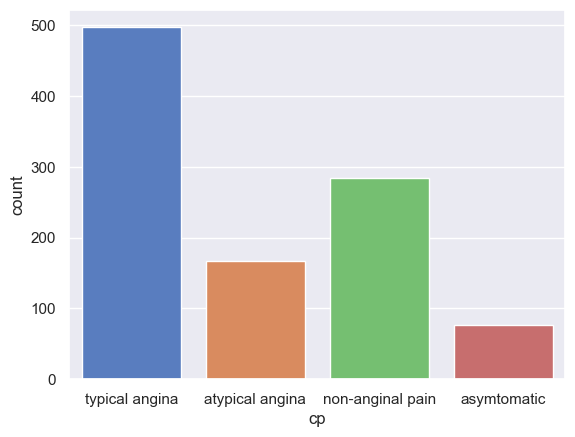

In [20]:
sns.countplot(x='cp',data=data)
plt.xticks([0,1,2,3], ["typical angina", "atypical angina", "non-anginal pain", "asymtomatic"])
# plt.xticks(rotation=2)

### Show the chest pain distribution as per target variable

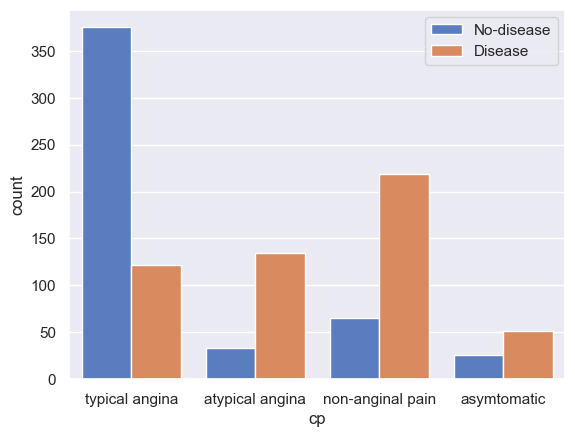

In [21]:
sns.countplot(x='cp', hue='target', data=data)
plt.xticks([0,1,2,3], ["typical angina", "atypical angina", "non-anginal pain", "asymtomatic"])
plt.legend(labels=['No-disease', 'Disease'])

### Show fasting blood sugar distribution according to target variable

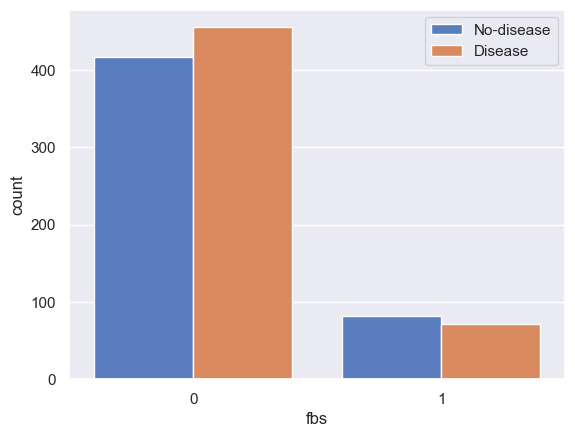

In [22]:
sns.countplot(x='fbs', hue='target', data=data)
plt.legend(labels=['No-disease', 'Disease'])

### Check resting blood pressure distribution

<AxesSubplot: >

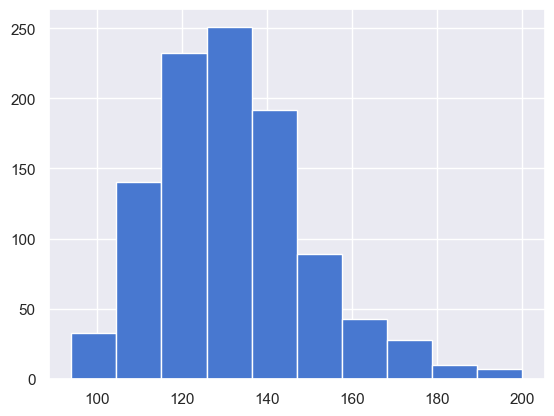

In [23]:
data['trestbps'].hist()

### Compare resting blood pressure as per sex column

c:\Users\TotNguyen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\TotNguyen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


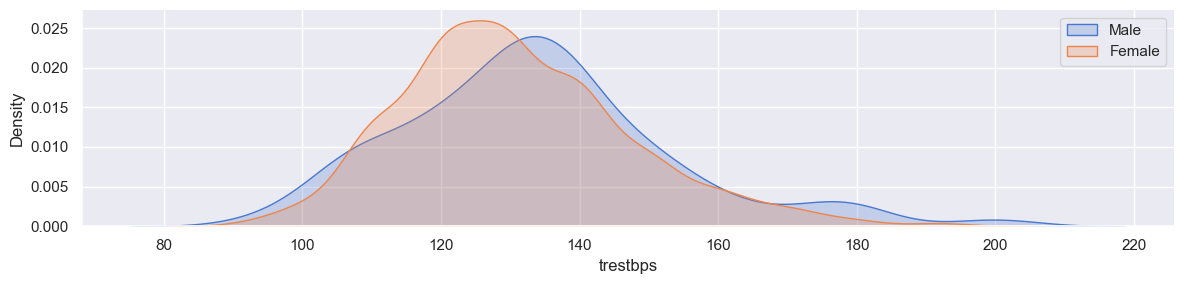

In [24]:
g = sns.FacetGrid(data,hue="sex",aspect =4)
g.map(sns.kdeplot, 'trestbps', shade=True)
plt.legend(labels=['Male', 'Female'])

### Show distribute of serum cholesterol

<AxesSubplot: >

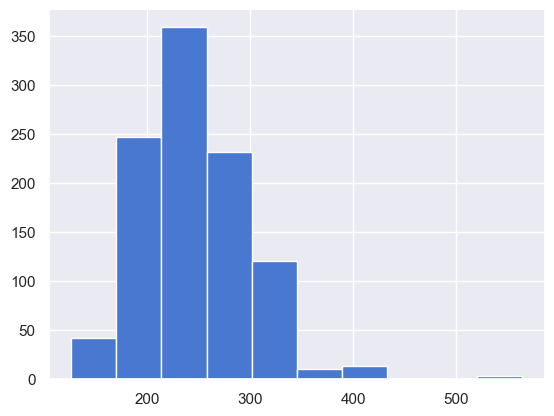

In [25]:
data['chol'].hist()

### Plot continuos variables

In [26]:
cate_val = []
cont_val = []

for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [27]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [28]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

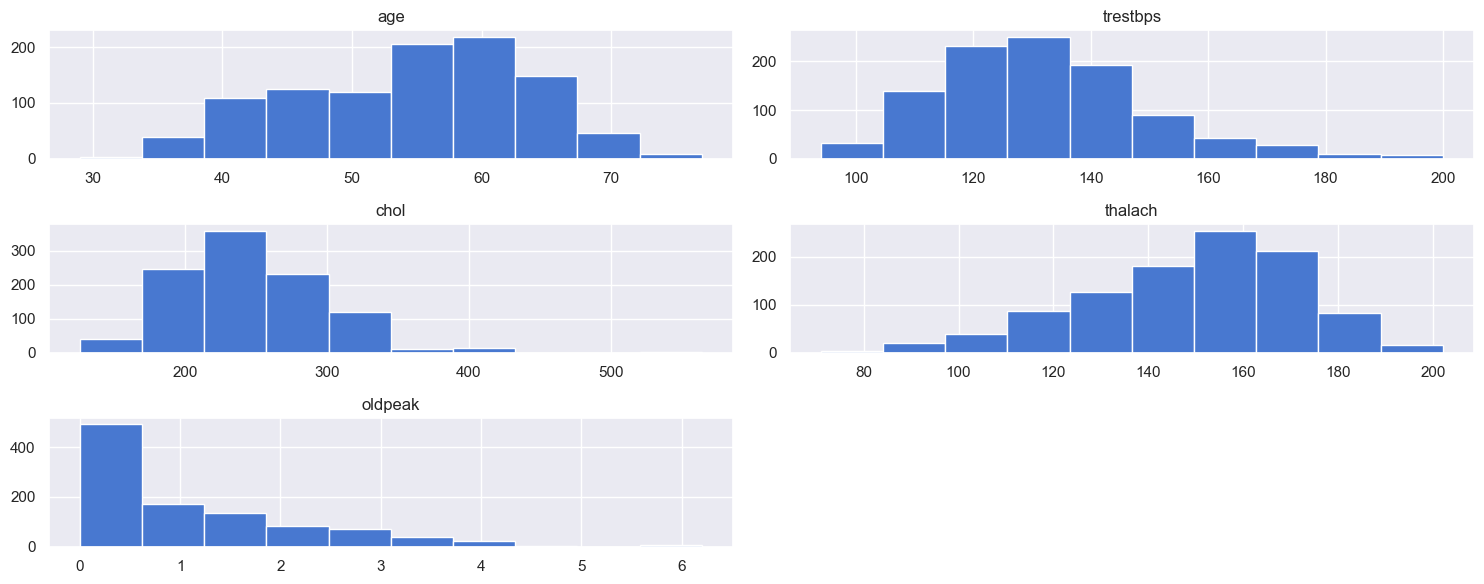

In [29]:
data.hist(cont_val, figsize=(15,6))
plt.tight_layout()

## 5) Modeling

### Prepare Modeling

In [30]:

x = data.drop(columns = 'target')
y = data['target']

# Chia tập dữ liệu thành 80% data cho train và 20% dữ liệu cho test 
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size= 0.20, random_state = 2)



In [31]:
y_train.value_counts()

1    426
0    394
Name: target, dtype: int64

In [32]:
y_test.value_counts()

0    105
1    100
Name: target, dtype: int64

### Model training

In [33]:
# Tạo ra đối tượng của lớp LogisticRegression
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)


c:\Users\TotNguyen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
Accuracy = LRmodel.score(X_test,y_test)
print("Accuracy:", Accuracy)

Accuracy: 0.8536585365853658


In [35]:
from sklearn.model_selection import GridSearchCV

# Định nghĩa một lưới tham số, các giá trị C và solver được sử dụng để tạo ra một tập hợp các cặp tham số khác nhau để đánh giá hiệu suất mô hình trên tập kiểm tra
log_reg_grid = {
    'C': np.logspace(-4,4,30),
    'solver':['liblinear']
}

grid = GridSearchCV(LogisticRegression(), log_reg_grid, cv=5, verbose=True)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [36]:
grid.best_params_

{'C': 4.893900918477489, 'solver': 'liblinear'}

In [37]:
print("Accuracy",grid.score(X_test,y_test))

Accuracy 0.8585365853658536


In [38]:
from sklearn.metrics import confusion_matrix
y_predict = grid.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cm, columns=['Predict = 0 ', 'Predict = 1'], index= ['Actual = 0','Actual = 1'])
print(df_cm)


            Predict = 0   Predict = 1
Actual = 0            85           20
Actual = 1             9           91


In [39]:
from sklearn.metrics import classification_report

rep = classification_report(y_test, y_predict)
print(rep)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       105
           1       0.82      0.91      0.86       100

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



## Nhận xét
- Tỉ lệ dự đoán đúng (precision) người không mắc bệnh : 90%, recall : 81%
- Tỉ lệ dự đoán đúng (precision) người mắc bệnh: 82%, recall: 91% 
- Độ chính xác của mô hình: 86%

 => Với độ chính xác cao, mô hình có thể dùng để dự đoán bệnh nhân có mắc bệnh tim hay không


### Feature importance

In [40]:
# Lựa chọn ra các thuộc tính quan trọng có ảnh hưởng đến kết quả dự đoán
grid = LogisticRegression(C=4.893900918477489,solver='liblinear')
grid.fit(X_train,y_train)


LogisticRegression(C=4.893900918477489, solver='liblinear')

In [41]:
# Tạo ra 1 dictionary gồm các tt của bộ dữ liệu  và giá trị hệ số t/ư của mô hình hồi qui được huấn luyện bằng grid search
feature_dict = dict(zip(data.columns,list(grid.coef_[0])))
feature_dict

{'age': -0.009491349764238453,
 'sex': -1.7350766380687626,
 'cp': 0.8641076658457104,
 'trestbps': -0.015153864783508931,
 'chol': -0.0051892846921428315,
 'fbs': -0.04069684669860363,
 'restecg': 0.42285934074433584,
 'thalach': 0.023203596180618076,
 'exang': -0.762573106643258,
 'oldpeak': -0.5000951403220402,
 'slope': 0.547283317283746,
 'ca': -0.6894840989204601,
 'thal': -0.9657400145602698}

<AxesSubplot: title={'center': 'Feature Importance of Logistic Regression'}>

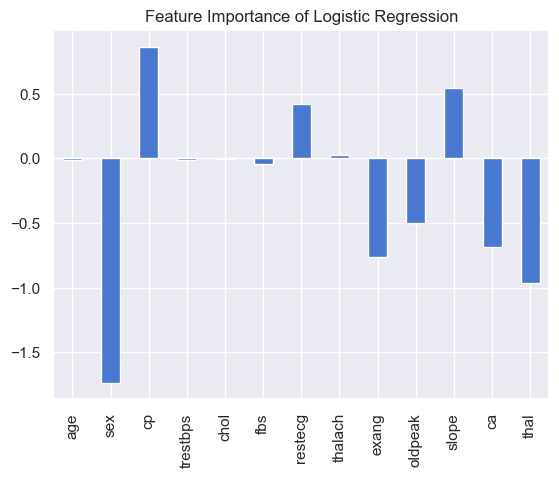

In [42]:
feature = pd.DataFrame(feature_dict , index=[0])
feature.T.plot.bar(title='Feature Importance of Logistic Regression', legend = False)

### Predict


In [43]:
def predict_disease(age, sex, cp , trestbps, chol, fbs, restecg, thalach, exang, oldpeak,slope,ca, thal):
    X= np.zeros(len(x.columns))

    X[0] = age
    X[1] = sex
    X[2] = cp
    X[3] = trestbps
    X[4] = chol
    X[5] = fbs
    X[6] = restecg
    X[7] = thalach
    X[8] = exang
    X[9] = oldpeak
    X[10] = slope
    X[11] = ca
    X[12] = thal

    return grid.predict([X])[0]

In [44]:
print("Predict:", predict_disease(22,5,0,119,220,0,1,168,0,1,2,2,3))

Predict: 0


c:\Users\TotNguyen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
